In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [2]:
train_data= pd.read_csv('boston_train.csv')
test_data= pd.read_csv('boston_test.csv')

In [3]:
train_data.shape, test_data.shape

((333, 15), (173, 14))

In [4]:
train_data.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
test_data.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64

In [7]:
train_data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


# all the datasets has significantly different range; hence it's essential to bring them down to a comparable scale using StandardScaler.

In [12]:
x_train, y_train= train_data.drop('medv', axis= 1), train_data['medv']
del train_data

# If the distriutions of data in training and testing sets differs significantly than it's wiser to fit the StandardScaler with the combination of two datasets, otherwise there might occur large discripenciy in the accuracy for two different sets.

# Let's ensure that the distribution of data points in the test set and the train set is similar. If the distribution turns out to be similar than we would only use train data to fit the StandardScaler and also we would be able to scale the 'medv' field. Otherwise, we will have to combine the test and train data and scale the combination of two, and we won't be able to scale 'medv' field in that cause.

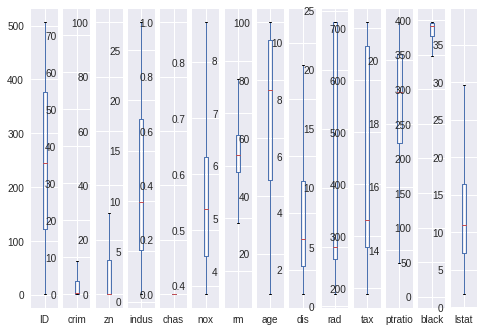

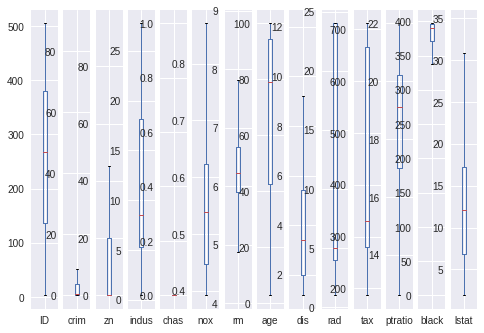

In [22]:
x_train.plot(kind= 'box', subplots= True)
test_data.plot(kind= 'box', subplots= True)
plt.show()

# Except fot the 'zn' field the distribution for both the test and train data seems to be preety much the same.

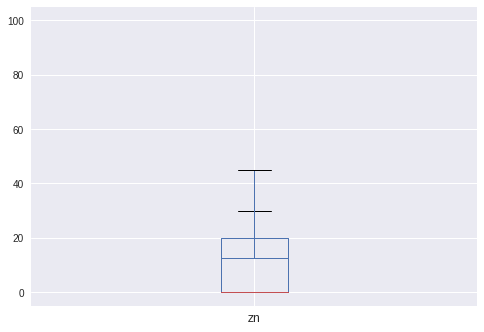

In [31]:
pd.DataFrame(x_train['zn']).boxplot()
pd.DataFrame(test_data['zn']).boxplot()
plt.show()

In [32]:
# Before taking any decision it would be better to have a look at the correlation between 'zn' and 'medv'

pd.concat((x_train['zn'], y_train), axis= 1).corr()

,zn,medv
zn,1.000000,0.344842
medv,0.344842,1.000000


# it can be seen that 'medv' has substantial correlation with 'zn'; hence there might be significant distiction between the distributions of 'medv' of two given sets.

In [33]:
comb= pd.concat((x_train, test_data), axis= 0)
scale= StandardScaler()
scale.fit(comb)
del comb

In [34]:
x_train= scale.transform(x_train)
test_data= scale.transform(test_data)

-0.0088531933471914393

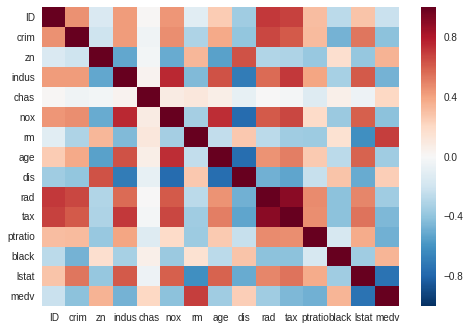

In [10]:
sns.heatmap(train_data.corr())
plt.show()

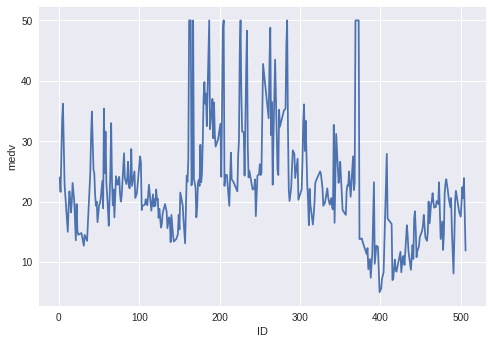

In [5]:
plt.plot(train_data['ID'], train_data['medv'])
plt.xlabel('ID')
plt.ylabel('medv')
plt.show()

# From the above plot thre exists an interesting structure of relationship betewwn the 'ID' and 'medv' . I appears that for IDs ranging from 180-380 'medv' is mostly high, whereas for other IDs 'medv' is mostly low. 
# It seems ID is not just any kind of randomly assigned lables to the data, insted it contains some essence of certain form of ordering. Hence, I am not going to drop this feature while modelling the data.